In [1]:
import tensorflow as tf
import numpy as np

In [2]:
_x = np.linspace(-1, 1, 100)[:, np.newaxis]
_noise = np.random.normal(0, 0.1, size=_x.shape)
_y = np.power(_x, 2) + _noise

In [3]:
with tf.variable_scope('inputs'):
    _tf_x = tf.placeholder(tf.float32, _x.shape, name='x')
    _tf_y = tf.placeholder(tf.float32, _y.shape, name='y')

In [4]:
with tf.variable_scope('net'):
    _layer = tf.layers.dense(_tf_x, 10, tf.nn.relu, name='hidden_layer')
    _output = tf.layers.dense(_layer, 1, name='output')
    
    tf.summary.histogram('out', _layer)
    tf.summary.histogram('pred', _output)

In [7]:
_loss = tf.losses.mean_squared_error(_tf_y, _output, scope='loss')
_train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(_loss)
tf.summary.scalar('loss',_loss)

<tf.Tensor 'loss_4:0' shape=() dtype=string>

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
writer = tf.summary.FileWriter('./log', sess.graph)
_op = tf.summary.merge_all()

for _step in range(100):
    _, _result = sess.run([_train, _op],{_tf_x:_x, _tf_y:_y})
    writer.add_summary(_result,_step)
#  tensorboard --logdir=

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import transform
from PIL import Image

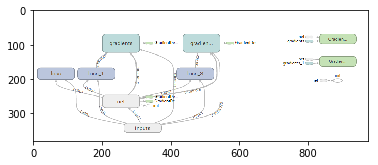

In [28]:
#_loss_pic = mpimg.imread('loss.bmp')
#_loss_pic.shape
#plt.imshow(_loss_pic) # 显示图片
#plt.axis('off') # 不显示坐标轴
#plt.show()
_network_pic = mpimg.imread('network.bmp')
plt.imshow(_network_pic)